In [1]:
import tensorflow as tf
import os

In [2]:
import numpy as np
import cv2
import imghdr
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data_dir='Data'

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
os.listdir(data_dir)

['Lewandowski', 'Messi', 'Modric', 'Neymar', 'Ronaldo']

In [6]:
os.path.join(data_dir,'Messi')

'Data\\Messi'

In [7]:
tip=imghdr.what(os.path.join(data_dir,'Messi','0x0.jpg'))
tip

'jpeg'

# Allowing only valid extentions:

for i in os.listdir(data_dir):
    for j in os.listdir(os.path.join(data_dir,i)):
        image_path=os.path.join(data_dir,i,j)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in the ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with Image {}'.format(image_path))
            

# Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 914 files belonging to 5 classes.


In [10]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
data_iterator

In [13]:
batch = data_iterator.next()

In [14]:
batch[0].shape

(32, 256, 256, 3)

In [15]:
batch[1]

array([0, 2, 2, 4, 3, 3, 1, 0, 2, 2, 2, 1, 4, 4, 0, 2, 2, 4, 2, 0, 1, 4,
       0, 4, 4, 4, 2, 0, 4, 4, 0, 4])

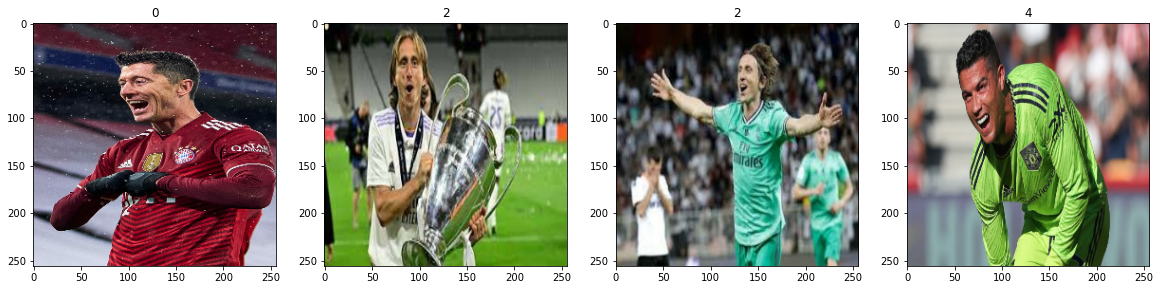

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data 

# Labels
- 0: Lewandowski
- 1: Messi
- 2: Modric
- 3: Neymar
- 4: Ronaldo

In [17]:
batch[0].shape

(32, 256, 256, 3)

In [18]:
batch[0].min()

0.0

In [19]:
batch[0].max()

255.0

In [20]:
#Scaling at the time of loading data from data pipeline
data = data.map(lambda x,y: (x/255, y)) 

In [21]:
data.as_numpy_iterator().next()[0].max()

1.0

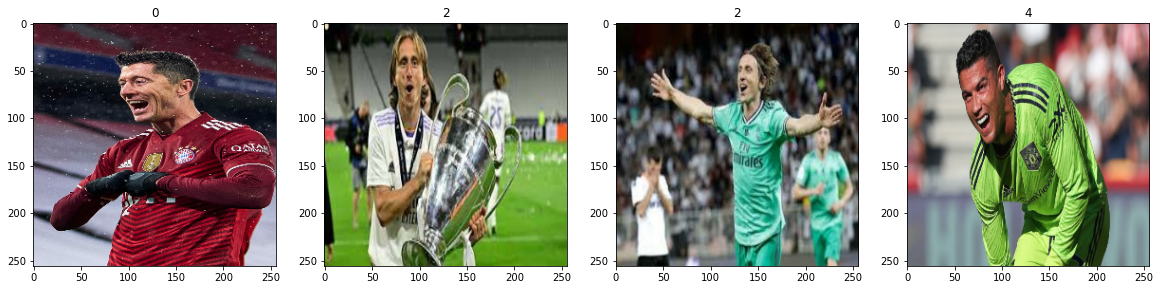

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Split Data

In [23]:
len(data)

29

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [25]:
print(train_size,test_size,val_size)

20 3 6


In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [27]:
print(len(train),len(val), len(test))

20 6 3


# Model Building 

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [44]:
model=Sequential()

In [45]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) ##Condense the data down

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='sigmoid'))

In [54]:
model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [51]:
logdir='logs'

In [52]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
20/20 [==============================] - 32s 1s/step - loss: 1.6047 - accuracy: 0.2453 - val_loss: 1.5595 - val_accuracy: 0.3750
Epoch 2/20
20/20 [==============================] - 30s 1s/step - loss: 1.4448 - accuracy: 0.4156 - val_loss: 1.3334 - val_accuracy: 0.4479
Epoch 3/20
20/20 [==============================] - 26s 1s/step - loss: 1.1207 - accuracy: 0.5984 - val_loss: 1.1153 - val_accuracy: 0.5833
Epoch 4/20
20/20 [==============================] - 33s 2s/step - loss: 0.6359 - accuracy: 0.7875 - val_loss: 0.9195 - val_accuracy: 0.7031
Epoch 5/20
20/20 [==============================] - 27s 1s/step - loss: 0.4055 - accuracy: 0.8703 - val_loss: 0.6673 - val_accuracy: 0.8073
Epoch 6/20
20/20 [==============================] - 31s 2s/step - loss: 0.2239 - accuracy: 0.9563 - val_loss: 0.8636 - val_accuracy: 0.7708
Epoch 7/20
20/20 [==============================] - 26s 1s/step - loss: 0.1080 - accuracy: 0.9688 - val_loss: 0.6553 - val_accuracy: 0.8438
Epoch 8/20
20/20 [==

# Plot Performance

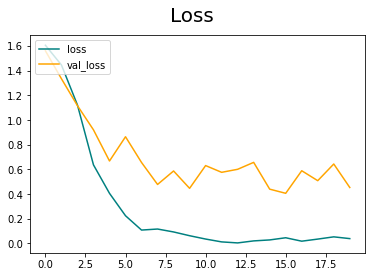

In [57]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

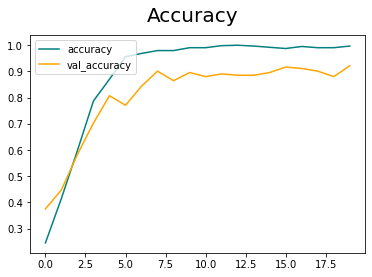

In [58]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Test

In [86]:
def final(path):
    dict_player={0:'Robert Lewandowski',1:'Lionel Messi',2:'Luka Modric',3:'Neymar Jr.',4:'Cristiano Ronaldo'}
    img=cv2.imread(path)
    resize = tf.image.resize(img, (256,256))
    yhat = model.predict(np.expand_dims(resize/255, 0))
    label_pred=np.argmax(yhat)
    return (dict_player.get(label_pred))

In [87]:
final('IMG_6835.jpg')

1/1 [==============================] - 0s 50ms/step


'Neymar Jr.'

In [90]:
final('16579280740814.jpg')

1/1 [==============================] - 0s 36ms/step


'Robert Lewandowski'

In [91]:
final('images326.jpg')

1/1 [==============================] - 0s 78ms/step


'Luka Modric'

In [94]:
final('1367123713.jpg')

1/1 [==============================] - 0s 45ms/step


'Luka Modric'